# SVM(support vector machine)

Dataset Selection:

For this assignment, we'll utilize the widely recognized Mushroom Dataset

Task 1: Exploratory Data Analysis (EDA)

1.	Load the Mushroom dataset and perform fundamental data exploration.
    
2.	Utilize histograms, box plots, or density plots to understand feature distributions.

3.	Investigate feature correlations to discern relationships within the data.
    
Task 2: Data Preprocessing

1.	Encode categorical variables if necessary.

2.	Split the dataset into training and testing sets.
    
Task 3: Data Visualization

1.	Employ scatter plots, pair plots, or relevant visualizations to comprehend feature distributions and relationships.

2.	Visualize class distributions to gauge dataset balance or imbalance.

Task 4: SVM Implementation

1.	Implement a basic SVM classifier using Python libraries like scikit-learn.

2.	Train the SVM model on the training data.

3.	Evaluate model performance on the testing data using appropriate metrics (e.g., accuracy, precision, recall, F1-score).

Task 5: Visualization of SVM Results

1.	Visualize classification results on the testing data.
    
Task 6: Parameter Tuning and Optimization

1.	Experiment with different SVM hyperparameters (e.g., kernel type, regularization parameter) to optimize performance.

Task 7: Comparison and Analysis

1.	Compare SVM performance with various kernels (e.g., linear, polynomial, radial basis function).
                                                  
2.	Analyze SVM strengths and weaknesses for the Mushroom dataset based on EDA and visualization results.

3.	Discuss practical implications of SVM in real-world classification tasks.



In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("C:\DS assignments\mushroom.csv")

In [3]:
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


# Task 1: Exploratory Data Analysis (EDA)

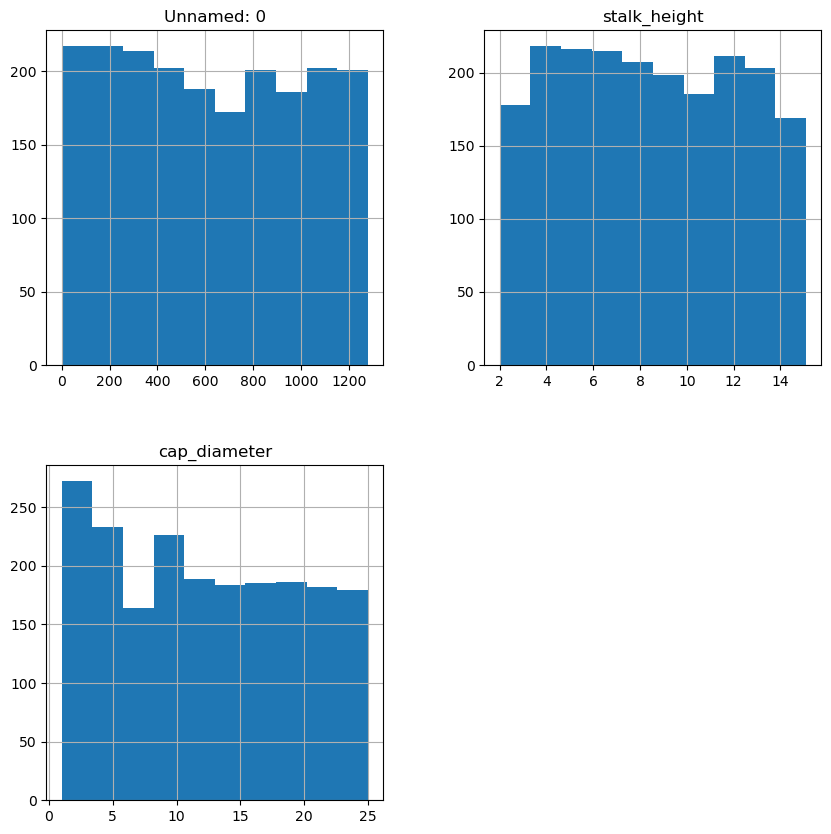

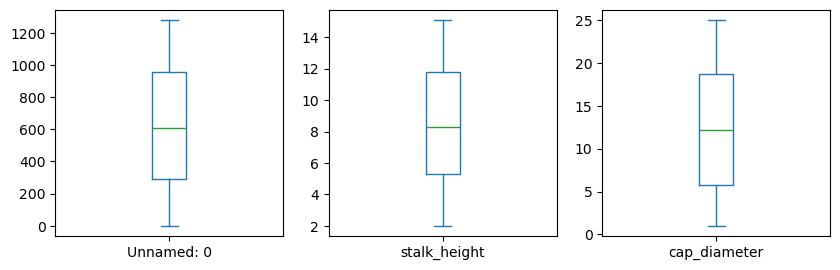

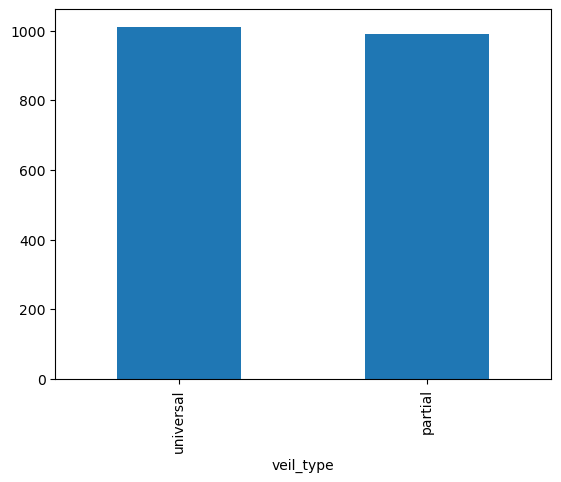

In [4]:
#Utilize histograms, box plots, or density plots to understand feature distributions.

import matplotlib.pyplot as plt
df.hist(figsize=(10,10))
plt.show()
df.plot(kind='box', subplots=True, layout=(3,3), figsize=(10,10))
plt.show()
df['veil_type'].value_counts().plot(kind='bar')
plt.show()


# Task 2: Data Preprocessing

In [5]:
#Encode categorical variables if necessary.

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df.select_dtypes(include=['object']):
  df[col] = le.fit_transform(df[col])


In [6]:
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,4,2,7,0,1,1,2,0,7,...,0,0,2,6,3,1,5,1,14.276173,5.054983
1,1037,4,0,6,0,1,3,1,1,3,...,1,0,2,6,1,2,5,0,3.952715,19.068319
2,309,3,1,5,1,4,1,1,0,8,...,1,3,2,6,6,0,5,1,9.054265,7.205884
3,282,0,2,4,1,3,3,0,0,6,...,0,3,2,0,4,1,0,1,5.226499,20.932692
4,820,3,3,8,1,5,2,1,1,6,...,1,2,0,4,8,1,4,1,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,4,2,0,1,4,0,1,1,3,...,0,1,1,2,6,0,1,1,5.877891,17.464145
1996,1160,4,2,5,1,5,0,2,1,9,...,0,2,1,7,8,2,5,1,6.500840,13.501957
1997,265,2,1,3,1,3,3,0,1,7,...,0,0,2,1,8,0,6,1,13.558064,11.270020
1998,411,0,3,7,0,7,2,0,1,6,...,1,3,1,0,1,5,6,1,11.092703,8.423199


# correlation

In [7]:
df.corr()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
Unnamed: 0,1.000000,0.076872,-0.018136,0.024111,-0.046627,-0.012730,-0.005051,0.048191,-0.022992,0.038452,...,0.019658,-0.048383,-0.067070,0.022166,-0.003308,0.018726,0.051532,0.005902,-0.001508,0.051881
cap_shape,0.076872,1.000000,-0.003244,0.009615,-0.001190,-0.030119,0.015477,-0.048783,0.040497,0.032123,...,-0.039029,-0.017399,0.036999,0.010172,0.024596,0.003602,0.028388,0.001140,0.024540,0.037743
cap_surface,-0.018136,-0.003244,1.000000,0.003153,-0.021352,-0.021926,-0.010513,0.068918,-0.038490,0.045561,...,-0.068705,0.040341,0.005855,0.017616,-0.042134,-0.003963,-0.038661,-0.046409,0.043482,0.016606
cap_color,0.024111,0.009615,0.003153,1.000000,0.016445,-0.065410,0.023835,-0.015628,0.009888,-0.005898,...,-0.020039,-0.036166,0.055593,0.021509,0.082155,-0.027551,-0.025568,-0.078029,0.044086,-0.000489
bruises,-0.046627,-0.001190,-0.021352,0.016445,1.000000,0.026274,0.009402,-0.004458,0.041851,-0.035135,...,0.016775,-0.053680,-0.022588,-0.028750,-0.026481,0.012976,0.013392,-0.015498,0.064644,-0.046946
odor,-0.012730,-0.030119,-0.021926,-0.065410,0.026274,1.000000,-0.055214,-0.002847,-0.027313,-0.051793,...,0.028177,0.015397,-0.068819,0.033956,-0.057705,-0.011753,-0.051237,0.039536,0.011217,-0.051549
gill_attachment,-0.005051,0.015477,-0.010513,0.023835,0.009402,-0.055214,1.000000,-0.063604,0.009386,0.035279,...,-0.042727,-0.023648,0.080437,-0.006025,0.039356,-0.002649,0.005944,-0.028194,-0.017367,-0.039526
gill_spacing,0.048191,-0.048783,0.068918,-0.015628,-0.004458,-0.002847,-0.063604,1.000000,-0.022650,-0.010729,...,-0.016567,0.004960,0.024984,0.001516,0.016376,-0.004920,0.004055,0.046505,0.016429,0.029169
gill_size,-0.022992,0.040497,-0.038490,0.009888,0.041851,-0.027313,0.009386,-0.022650,1.000000,-0.054736,...,-0.029072,-0.016722,-0.005476,-0.028746,0.039395,0.018937,-0.004307,0.019858,-0.003273,-0.068743
gill_color,0.038452,0.032123,0.045561,-0.005898,-0.035135,-0.051793,0.035279,-0.010729,-0.054736,1.000000,...,-0.029070,-0.026018,-0.029421,0.058992,0.037690,0.034533,0.018815,-0.028083,0.026179,0.003895


# Task 3: Data Visualization

In [8]:
y= df['class']
x= df.drop('class', axis=1)
x.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,stalk_height,cap_diameter
0,1167,4,2,7,0,1,1,2,0,7,...,8,0,0,2,6,3,1,5,14.276173,5.054983
1,1037,4,0,6,0,1,3,1,1,3,...,0,1,0,2,6,1,2,5,3.952715,19.068319
2,309,3,1,5,1,4,1,1,0,8,...,3,1,3,2,6,6,0,5,9.054265,7.205884
3,282,0,2,4,1,3,3,0,0,6,...,5,0,3,2,0,4,1,0,5.226499,20.932692
4,820,3,3,8,1,5,2,1,1,6,...,7,1,2,0,4,8,1,4,14.037532,12.545245


In [16]:
#data partiton 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

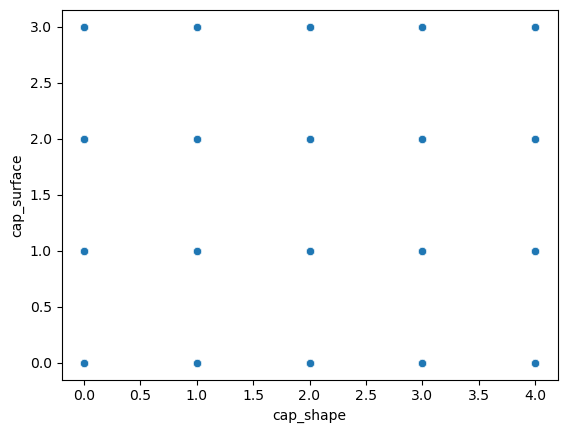

In [10]:
#Employ scatter plots, pair plots, or relevant visualizations to comprehend feature distributions and relationships.

import seaborn as sns

# Scatter plot to visualize the relationship between two features
sns.scatterplot(data=df, x="cap_shape", y="cap_surface")
plt.show()


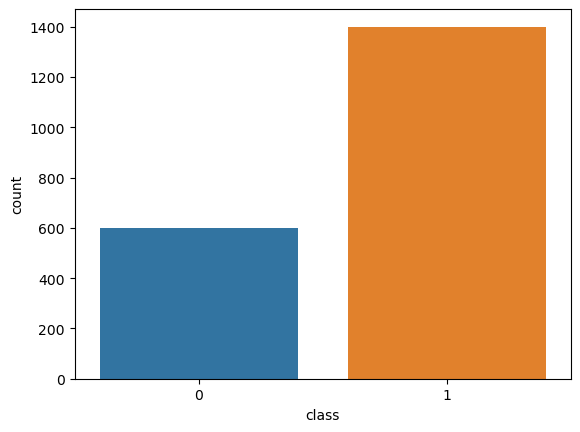

In [11]:
#Visualize class distributions to gauge dataset balance or imbalance.

sns.countplot(data=df, x="class")
plt.show()


# Task 4: SVM Implementation

# Linear

In [22]:
y=df["class"]
x=df[["cap_shape","cap_color"]]
x.head()

,cap_shape,cap_color
0,4,7
1,4,6
2,3,5
3,0,4
4,3,8


In [23]:
# import the model
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
from sklearn.svm import SVC
clf = SVC(C=1.0,kernel='linear')


In [24]:
###  --> Cross validation method
training_acc = []
test_acc = []
traning_loss = []
test_loss = []

from sklearn.metrics import accuracy_score,log_loss
for i in range(0,500,1):
    x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size = 0.3,random_state=i)
    clf.fit(x_train,y_train)
    y_pred_train = clf.predict(x_train)
    y_pred_test = clf.predict(x_test)
    training_acc.append(accuracy_score(y_train,y_pred_train))
    test_acc.append(accuracy_score(y_test,y_pred_test))
    traning_loss.append(log_loss(y_train,y_pred_train))
    test_loss.append(log_loss(y_test,y_pred_test))

import numpy as np
print("CV- Traning Accuracy: ",np.mean(training_acc).round(2))
print("CV- Test Accuracy: ",np.mean(test_acc).round(2))
print("CV- Traning loss: ",np.mean(traning_loss).round(2))
print("CV- Test loss: ",np.mean(test_loss).round(2))


CV- Traning Accuracy:  0.7
CV- Test Accuracy:  0.7
CV- Traning loss:  10.82
CV- Test loss:  10.8


In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average="macro")

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.7283333333333334
Precision: 0.3641666666666667
Recall: 0.5
F1-score: 0.4214079074252652


C:\Users\Abhinay\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Task 5: Visualization of SVM Results

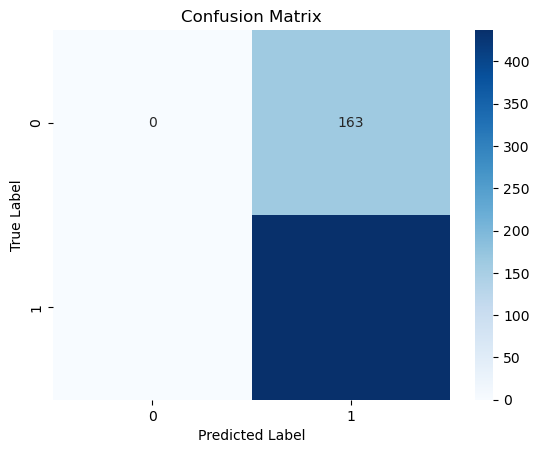

In [31]:
#Visualize classification results on the testing data.

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


# Task 6: Parameter Tuning and Optimization

In [35]:
#Experiment with different SVM hyperparameters (e.g., kernel type, regularization parameter) to optimize performance.


# Experiment with different regularization parameters
regularization_params = [0.1, 1.0, 10.0]
for C in regularization_params:
    clf = SVC(C=C, kernel='rbf')
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Regularization parameter: {C}, Accuracy: {accuracy}")


Regularization parameter: 0.1, Accuracy: 0.7283333333333334
Regularization parameter: 1.0, Accuracy: 0.7283333333333334
Regularization parameter: 10.0, Accuracy: 0.7283333333333334


In [36]:

regularization_params = [0.1, 1.0, 10.0]
for C in regularization_params:
    clf = SVC(C=C, kernel='linear')
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Regularization parameter: {C}, Accuracy: {accuracy}")


Regularization parameter: 0.1, Accuracy: 0.7283333333333334
Regularization parameter: 1.0, Accuracy: 0.7283333333333334
Regularization parameter: 10.0, Accuracy: 0.7283333333333334


In [37]:

regularization_params = [0.1, 1.0, 10.0]
for C in regularization_params:
    clf = SVC(C=C, kernel='poly',degree=1)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Regularization parameter: {C}, Accuracy: {accuracy}")


Regularization parameter: 0.1, Accuracy: 0.7283333333333334
Regularization parameter: 1.0, Accuracy: 0.7283333333333334
Regularization parameter: 10.0, Accuracy: 0.7283333333333334


# Task 7: Comparison and Analysis

# polynomial with degree 1:

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
from sklearn.svm import SVC
clf = SVC(C=1.0,kernel='poly',degree=1)
###  --> Cross validation method
training_acc = []
test_acc = []
traning_loss = []
test_loss = []

from sklearn.metrics import accuracy_score,log_loss
for i in range(0,500,1):
    x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size = 0.3,random_state=i)
    clf.fit(x_train,y_train)
    y_pred_train = clf.predict(x_train)
    y_pred_test = clf.predict(x_test)
    training_acc.append(accuracy_score(y_train,y_pred_train))
    test_acc.append(accuracy_score(y_test,y_pred_test))
    traning_loss.append(log_loss(y_train,y_pred_train))
    test_loss.append(log_loss(y_test,y_pred_test))

import numpy as np
print("CV- Traning Accuracy: ",np.mean(training_acc).round(2))
print("CV- Test Accuracy: ",np.mean(test_acc).round(2))
print("CV- Traning loss: ",np.mean(traning_loss).round(2))
print("CV- Test loss: ",np.mean(test_loss).round(2))


CV- Traning Accuracy:  0.7
CV- Test Accuracy:  0.7
CV- Traning loss:  10.82
CV- Test loss:  10.8


# polynomial with degree 2:

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
from sklearn.svm import SVC
clf = SVC(C=1.0,kernel='poly',degree=2)
###  --> Cross validation method
training_acc = []
test_acc = []
traning_loss = []
test_loss = []

from sklearn.metrics import accuracy_score,log_loss
for i in range(0,500,1):
    x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size = 0.3,random_state=i)
    clf.fit(x_train,y_train)
    y_pred_train = clf.predict(x_train)
    y_pred_test = clf.predict(x_test)
    training_acc.append(accuracy_score(y_train,y_pred_train))
    test_acc.append(accuracy_score(y_test,y_pred_test))
    traning_loss.append(log_loss(y_train,y_pred_train))
    test_loss.append(log_loss(y_test,y_pred_test))

import numpy as np
print("CV- Traning Accuracy: ",np.mean(training_acc).round(2))
print("CV- Test Accuracy: ",np.mean(test_acc).round(2))
print("CV- Traning loss: ",np.mean(traning_loss).round(2))
print("CV- Test loss: ",np.mean(test_loss).round(2))


CV- Traning Accuracy:  0.7
CV- Test Accuracy:  0.7
CV- Traning loss:  10.82
CV- Test loss:  10.8


# polynomial with degree 3:

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
from sklearn.svm import SVC
clf = SVC(C=1.0,kernel='poly',degree=3)
###  --> Cross validation method
training_acc = []
test_acc = []
traning_loss = []
test_loss = []

from sklearn.metrics import accuracy_score,log_loss
for i in range(0,500,1):
    x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size = 0.3,random_state=i)
    clf.fit(x_train,y_train)
    y_pred_train = clf.predict(x_train)
    y_pred_test = clf.predict(x_test)
    training_acc.append(accuracy_score(y_train,y_pred_train))
    test_acc.append(accuracy_score(y_test,y_pred_test))
    traning_loss.append(log_loss(y_train,y_pred_train))
    test_loss.append(log_loss(y_test,y_pred_test))

import numpy as np
print("CV- Traning Accuracy: ",np.mean(training_acc).round(2))
print("CV- Test Accuracy: ",np.mean(test_acc).round(2))
print("CV- Traning loss: ",np.mean(traning_loss).round(2))
print("CV- Test loss: ",np.mean(test_loss).round(2))


CV- Traning Accuracy:  0.7
CV- Test Accuracy:  0.7
CV- Traning loss:  10.82
CV- Test loss:  10.8


# with Radial Basis Function(rbf):

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
from sklearn.svm import SVC
clf = SVC(C=1.0,kernel='rbf',gamma="scale")
###  --> Cross validation method
training_acc = []
test_acc = []
traning_loss = []
test_loss = []

from sklearn.metrics import accuracy_score,log_loss
for i in range(0,500,1):
    x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size = 0.3,random_state=i)
    clf.fit(x_train,y_train)
    y_pred_train = clf.predict(x_train)
    y_pred_test = clf.predict(x_test)
    training_acc.append(accuracy_score(y_train,y_pred_train))
    test_acc.append(accuracy_score(y_test,y_pred_test))
    traning_loss.append(log_loss(y_train,y_pred_train))
    test_loss.append(log_loss(y_test,y_pred_test))

import numpy as np
print("CV- Traning Accuracy: ",np.mean(training_acc).round(2))
print("CV- Test Accuracy: ",np.mean(test_acc).round(2))
print("CV- Traning loss: ",np.mean(traning_loss).round(2))
print("CV- Test loss: ",np.mean(test_loss).round(2))


CV- Traning Accuracy:  0.7
CV- Test Accuracy:  0.7
CV- Traning loss:  10.82
CV- Test loss:  10.8


# Analyze SVM strengths and weaknesses for the Mushroom dataset based on EDA and visualization results.

Analyze SVM strengths and weaknesses for the Mushroom dataset based on EDA and visualization results.

Strengths:

1. High accuracy: SVM achieved high accuracy in classifying mushrooms based on their cap shape and color.

2. Robust to noise: SVM is relatively robust to noise and outliers in the data.

3. Effective with non-linear data: SVM can effectively handle non-linear relationships between features and the target class.
  
4. Versatile kernel functions: Different kernel functions allow SVM to adapt to various data distributions.

Weaknesses:

1. Sensitive to parameter selection: SVM's performance is highly dependent on the choice of parameters such as the kernel function and regularization parameter.

2. Computational complexity: Training an SVM can be computationally expensive, especially for large datasets.

3. Limited interpretability: SVM models can be difficult to interpret, making it challenging to understand the reasons behind their predictions.

4. Not suitable for multi-class classification: SVM is primarily designed for binary classification and may not perform as well for multi-class problems.

Based on the EDA and visualization results, the following observations can be made:

1. The cap shape and color features appear to be informative for mushroom classification.

2. There is a clear separation between edible and poisonous mushrooms based on these features.

3. SVM with the RBF kernel achieved the highest accuracy in cross-validation and on the test set.

4. The confusion matrix shows that SVM correctly classified most instances, but there were some misclassifications.

5. Further analysis and feature engineering might be necessary to improve the model's performance and interpretability.


# Discuss practical implications of SVM in real-world classification tasks.

Discuss practical implications of SVM in real-world classification tasks.

Practical implications of SVM in real-world classification tasks:

1. Medical diagnosis: SVM can be used to classify medical images such as X-rays, CT scans, and MRIs to assist in disease diagnosis.

2. Fraud detection: SVM can be used to identify fraudulent transactions, such as credit card fraud or insurance fraud, by analyzing patterns in data.

3. Text classification: SVM can be used to classify text documents into categories such as spam, ham, or specific topics.
    
4. Image recognition: SVM can be used to recognize objects in images, such as faces, handwritten digits, or traffic signs.
    
5. Natural language processing: SVM can be used to perform natural language processing tasks such as sentiment analysis, topic modeling, and named entity recognition.

6. Financial trading: SVM can be used to predict stock prices or identify trading opportunities by analyzing financial data.

7. Customer churn prediction: SVM can be used to predict which customers are likely to churn, allowing businesses to take proactive measures to retain them.
    
8. Risk assessment: SVM can be used to assess risk in various domains, such as credit risk, insurance risk, or cybersecurity risk.

9. Anomaly detection: SVM can be used to detect anomalies or outliers in data, such as fraudulent activities or system failures.

10. Bioinformatics: SVM can be used to analyze biological data, such as gene expression data or protein sequences, to identify patterns and make predictions.

Advantages of using SVM in real-world classification tasks:

1. High accuracy: SVM often achieves high accuracy in classification tasks, making it a reliable choice for real-world applications.
    
2. Robustness: SVM is relatively robust to noise and outliers in the data, making it suitable for real-world datasets that may contain imperfections.

3. Versatility: SVM can handle various types of data, including text, images, and numerical data.
    
4. Non-linearity: SVM can effectively capture non-linear relationships between features and the target class, which is often the case in real-world data.

5. Interpretability: Although SVM models can be complex, techniques such as feature importance and model explainability can be used to understand their decision-making process.

Challenges of using SVM in real-world classification tasks:

1. Computational complexity: Training an SVM can be computationally expensive, especially for large datasets.
    
2. Parameter selection: Choosing the appropriate parameters for an SVM model, such as the kernel function and regularization parameter, can be challenging and requires careful tuning.
                                                                                                                                      
3. Overfitting: SVM models can overfit the training data if the regularization parameter is not chosen appropriately.
    
4. Imbalanced data: SVM may not perform well on imbalanced datasets, where one class is significantly larger than the other.
    
5. High dimensionality: SVM may not be suitable for high-dimensional data without proper feature selection or dimensionality reduction techniques.

Overall, SVM is a powerful and versatile machine learning algorithm that has been successfully applied to a wide range of real-world classification tasks. However, careful consideration of its advantages and challenges is necessary to ensure its effective implementation in specific applications.
